In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('D:/ML/1 WEEK/playstore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8586,DN Sync,NEWS_AND_MAGAZINES,4.1,56,28.000000,"1,000+",Free,0,Everyone 10+,News & Magazines,"June 13, 2016",1.15,2.3.3 and up
10706,Neon Blue Gaming Wallpaper&Theme fo Lenovo K8 ...,BUSINESS,4.6,7,2000.000000,500+,Free,0,Everyone,Business,"August 24, 2017",1.0.0,2.3.3 and up
1995,Bubble Shooter Space,GAME,4.2,4355,21516.529524,"1,000,000+",Free,0,Everyone,Casual,"July 17, 2017",1.6,2.3 and up
6672,"Zetup, print in one click",TOOLS,NaN,40,24000.000000,"1,000+",Free,0,Everyone,Tools,"January 26, 2018",1.11.6,5.0 and up
9762,Kids Doctor ER Emergency Rescue Kids Hospital ...,FAMILY,3.8,515,85000.000000,"100,000+",Free,0,Everyone,Simulation,"July 20, 2018",7,4.1 and up


In [5]:
data.shape

(10841, 13)

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 1. Data clean up – Missing value treatment
###    a. Drop records where rating is missing since rating is our target/study variable

In [7]:

data= data.dropna(subset=['Rating'],axis='rows')

In [8]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column.

In [9]:
pd.isna(data['Android Ver']).sum()

3

In [10]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### In Category column 

### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
i=data[((data.App == 'Life Made WI-Fi Touchscreen Photo Frame') & (data['Android Ver'].isnull()))].index
print(i)
data.drop(i,inplace=True)
        

Int64Index([10472], dtype='int64')


In [12]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


##### 3rd Record has been deleted

### iii. Replace remaining missing values with the mode

In [13]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [14]:
data['Android Ver']=data.fillna({ 'Android Ver':data['Android Ver'].mode()})          
          

In [15]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### c. Current ver – replace with most common value

In [16]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,Learn To Draw Kawaii Characters
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,Market Update Helper
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,Virtual DJ Sound Mixer
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,Dots puzzle


In [17]:
data['Current Ver']=data.fillna({ 'Current Ver':data['Current Ver'].mode()})          
          

In [18]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 2. Data clean up – correcting the data types


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### a. Which all variables need to be brought to numeric types?

#### Ans) Reviews, Installs & Price 

###  b. Price variable – remove sign dollar and convert to float

In [20]:
data['Price'].sample(5)

3625     0
7207     0
10024    0
8878     0
7530     0
Name: Price, dtype: object

In [21]:
data['Price']=data.Price.apply(lambda x: x.replace('$','')).astype(float)

In [22]:
data['Price'].sample(5)

4452     0.99
1646     0.00
10003    0.00
9498     0.00
2396     0.00
Name: Price, dtype: float64

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [23]:
data['Installs'].sample(5)

5651    100,000,000+
6033        100,000+
9170      1,000,000+
6899         50,000+
3046      1,000,000+
Name: Installs, dtype: object

In [24]:
data['Installs']= data.Installs.apply(lambda x:x.replace(',',''))
data['Installs']=data.Installs.apply(lambda x:x.replace('+',''))

In [25]:
data['Installs'].sample(5)

4025       5000
3068    5000000
7997        100
6009     500000
7798        100
Name: Installs, dtype: object

### d. Convert all other identified columns to numeric

In [26]:
#data['Price'] = data[['Price']].astype(float)

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
data['Reviews'] = data[['Reviews']].astype(int)

data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
data['Installs'] = data[['Installs']].astype(float)

data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [29]:
data['Rating']= data['Rating'].astype(float)
data['Size']= data['Size'].astype(int)
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


### 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.


#### i. Are there any such records? Drop if so.

In [31]:
data['Rating'].sample(5)

4377    4.1
731     4.7
4338    4.2
5579    2.8
3960    4.3
Name: Rating, dtype: float64

In [32]:
(data['Rating']>5).sum()

0

### b. Reviews should not be more than installs as only those who installed can review the app.

#### i. Are there any such records? Drop if so.

In [33]:
(data['Reviews']>data['Installs']).sum()

7

In [34]:
data.drop(data[data['Reviews']>data['Installs']].index,axis=0,inplace=True)

In [35]:
(data['Reviews']>data['Installs']).sum()

0

### 4. Identify and handle outliers –
### a. Price column
#### i. Make suitable plot to identify outliers in price

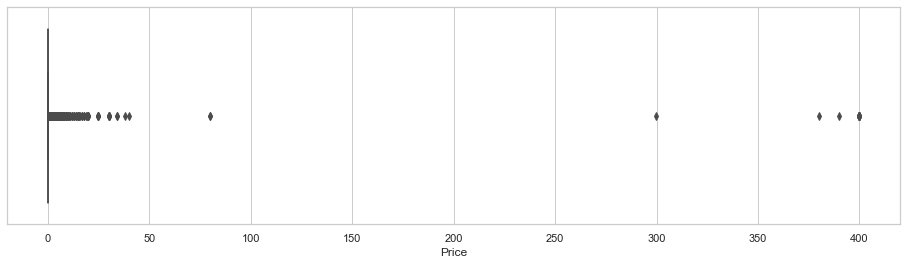

In [36]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
sns.boxplot(x='Price',data=data,palette='Set1');

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [37]:
(data['Price']>200).sum()

15

In [38]:
data.drop(data[data['Price']>200].index,axis=0,inplace=True)

In [39]:
(data['Price']>200).sum()

0

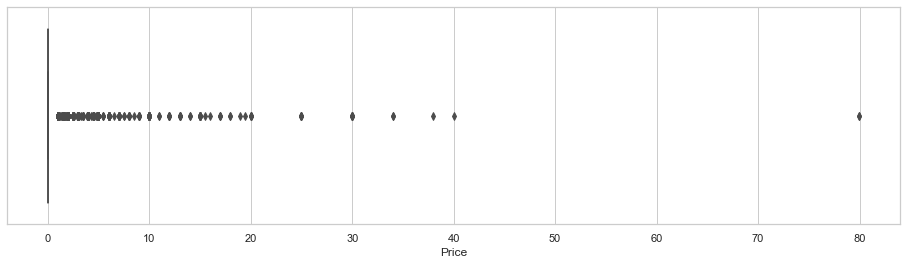

In [40]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
sns.boxplot(x='Price',data=data,palette='Set1');

In [41]:
(data['Price']>30).sum()

6

In [42]:
data.drop(data[data['Price']>30].index,axis=0,inplace=True)

In [43]:
(data['Price']>30).sum()

0

### b. Reviews column
### i. Make suitable plot

(array([9.045e+03, 1.670e+02, 6.600e+01, 1.500e+01, 8.000e+00, 1.100e+01,
        3.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 7.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.00000000e+00, 3.90791625e+06, 7.81583150e+06, 1.17237468e+07,
        1.56316620e+07, 1.95395772e+07, 2.34474925e+07, 2.73554078e+07,
        3.12633230e+07, 3.51712382e+07, 3.90791535e+07, 4.29870688e+07,
        4.68949840e+07, 5.08028992e+07, 5.47108145e+07, 5.86187298e+07,
        6.25266450e+07, 6.64345602e+07, 7.03424755e+07, 7.42503908e+07,
        7.81583060e+07]),
 <a list of 20 Patch objects>)

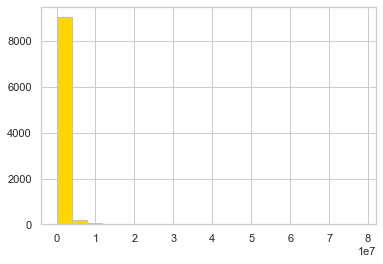

In [44]:
plt.hist(x='Reviews',bins=20,color='gold',edgecolor='silver',data=data,alpha=1)

### ii. Limit data to apps with < 1 Million reviews

In [45]:
(data['Reviews']>1000000).sum()

704

In [46]:
data.drop(data[data['Reviews']>1000000].index,axis=0,inplace=True)

In [47]:
(data['Reviews']>1000000).sum()

0

### c. Installs
### i. What is the 95th percentile of the installs?

In [48]:
qnt = data['Installs'].quantile(.95)
qnt

10000000.0

In [49]:
data.quantile(.95) 

Rating             4.80
Reviews       413140.35
Size           68000.00
Installs    10000000.00
Price              1.99
Name: 0.95, dtype: float64

#### Ans) Installs - NaN

### ii. Drop records having a value more than the 95th percentile

In [50]:
data.drop(data[data['Installs']>qnt].index,axis=0,inplace=True)

### Data analysis to answer business questions
### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


Skewness: -1.743427
Kurtosis: 5.153913


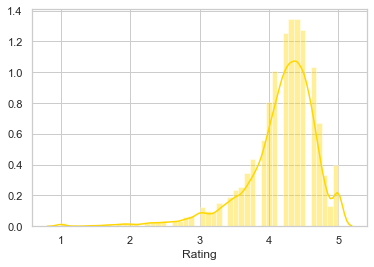

In [51]:
sns.distplot(data['Rating'] , color="gold")
print("Skewness: %f" % data['Rating'].skew())
print("Kurtosis: %f" % data['Rating'].kurt())

### b. What is the implication of this on your analysis?

#### From the analysis we can see that Ratings displays Negative Skewness & Laptokurtic Kurtosis

### 6. What are the top Content Rating values?

In [52]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


### b. If yes, drop those as they won’t help in the analysis

In [53]:
data.drop(data[(data['Content Rating'] == 'Adults only 18+')].index,axis=0,inplace=True)
data.drop(data[(data['Content Rating']== 'Unrated')].index,axis=0,inplace=True)

In [54]:
data.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900


### 7. Effect of size on rating
### a. Make a joinplot to understand the effect of size on rating

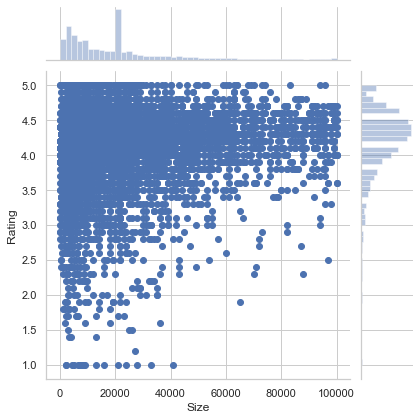

In [55]:
sns.jointplot(x="Size", y="Rating", data = data);

### b. Do you see any patterns?

### There is no pattern of size on rating. There is more data reflected between rating 4.0 - 5.0 & of size 0 - 3000.

### 8. Effect of price on rating
### a. Make a jointplot (with regression line)

In [56]:
data['Installs'] = data['Installs'].astype(int)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8431 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8431 non-null   object 
 1   Category        8431 non-null   object 
 2   Rating          8431 non-null   float64
 3   Reviews         8431 non-null   int32  
 4   Size            8431 non-null   int32  
 5   Installs        8431 non-null   int32  
 6   Type            8431 non-null   object 
 7   Price           8431 non-null   float64
 8   Content Rating  8431 non-null   object 
 9   Genres          8431 non-null   object 
 10  Last Updated    8431 non-null   object 
 11  Current Ver     8431 non-null   object 
 12  Android Ver     8431 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 823.3+ KB


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


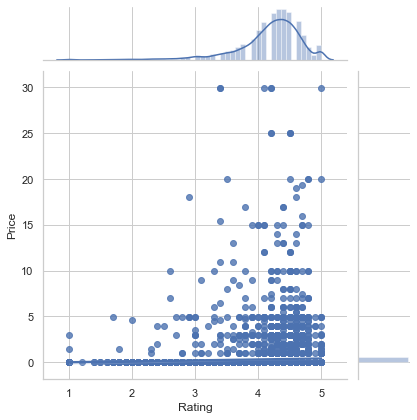

In [58]:
sns.jointplot(x='Rating', y='Price', data=data,kind="reg")

### b. What pattern do you see?

#### There is no corelation between Price and Rating

### c. How do you explain the pattern?

#### Most of the data points are near Price (value=0) for all ratings categories

### d. Replot the data, this time with only records with price > 0

In [59]:
Price_greater_then_zero= data[(data["Price"]>0)]

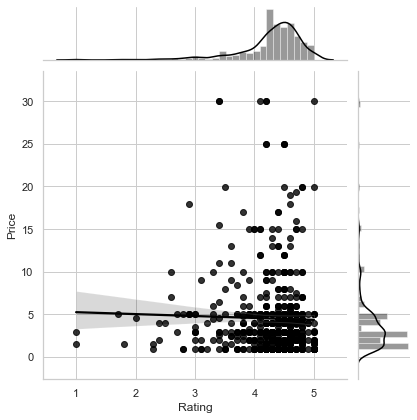

In [60]:
sns.jointplot(x="Rating",y="Price",data=Price_greater_then_zero,color="black",kind="reg")

### e. Does the pattern change?

#### No there is no change in pattern after reploting (price>0) irrespective of some negative correlation

### f. What is your overall inference on the effect of price on the rating

#### There is no effect of price on rating 

### 9. Look at all the numeric interactions together –
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8431 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             8431 non-null   object  
 1   Category        8431 non-null   object  
 2   Rating          8431 non-null   float64 
 3   Reviews         8431 non-null   int32   
 4   Size            8431 non-null   int32   
 5   Installs        8431 non-null   int32   
 6   Type            8431 non-null   object  
 7   Price           8431 non-null   float64 
 8   Content Rating  8431 non-null   object  
 9   Genres          8431 non-null   object  
 10  Last Updated    8431 non-null   object  
 11  Current Ver     8431 non-null   object  
 12  Android Ver     8431 non-null   object  
 13  bucket          8431 non-null   category
dtypes: category(1), float64(2), int32(3), object(8)
memory usage: 1.1+ MB


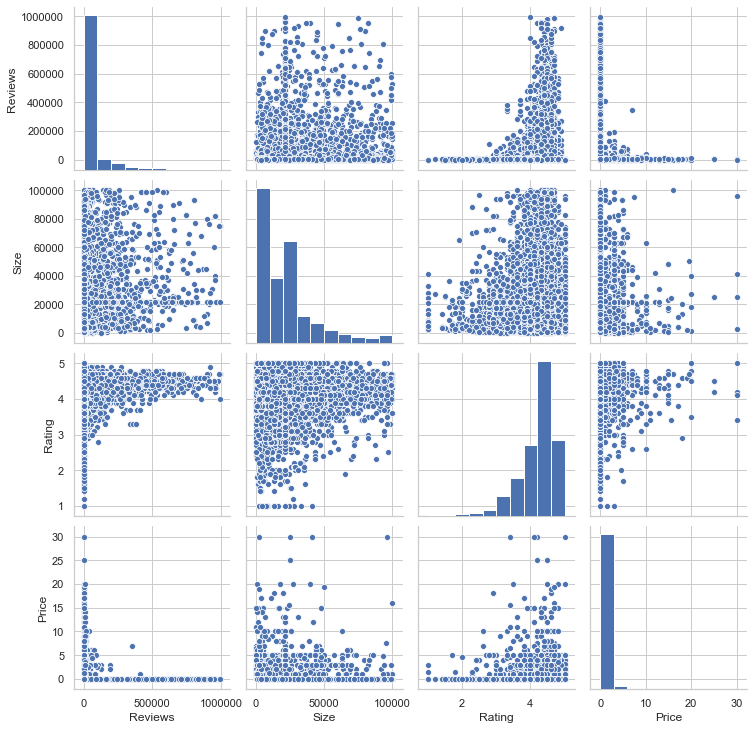

In [61]:
g=sns.pairplot(data,vars=["Reviews","Size","Rating","Price"])

### 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

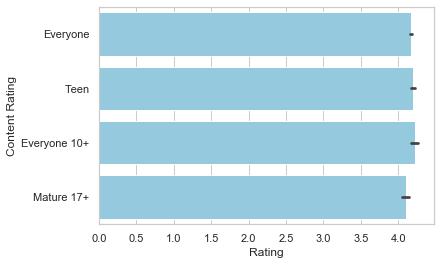

In [62]:
sns.barplot(x="Rating",y="Content Rating",data=data,color="skyblue");

### b. Which metric would you use? Mean? Median? Some other quantile?

### c. Choose the right metric and plot

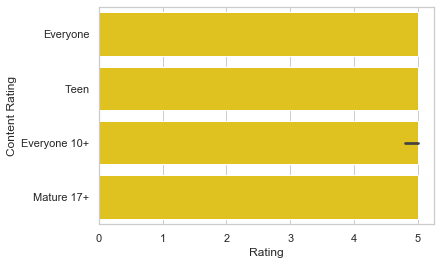

In [63]:
from statistics import mean
sns.barplot(x="Rating",y="Content Rating",data=data,color="gold",estimator=max)

### 11. Content rating vs. size vs. rating – 3 variables at a time
### a. Create 5 buckets (20% records in each) based on Size

In [64]:
data['bucket'] = pd.qcut(data['Size'], q=5)
data['bucket'].value_counts()

(12000.0, 21516.0]     2310
(4600.0, 12000.0]      1789
(7.999, 4600.0]        1713
(32000.0, 100000.0]    1682
(21516.0, 32000.0]      937
Name: bucket, dtype: int64

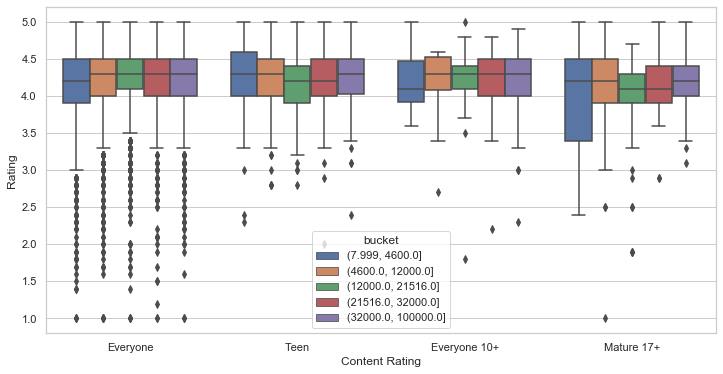

In [65]:
# Reference - Tushar Dalal
plt.figure(figsize=(12,6))
sns.boxplot(x='Content Rating',y='Rating',hue='bucket',data=data);

### c. Make a heatmap of this
### i. Annotated
### ii. Greens color map

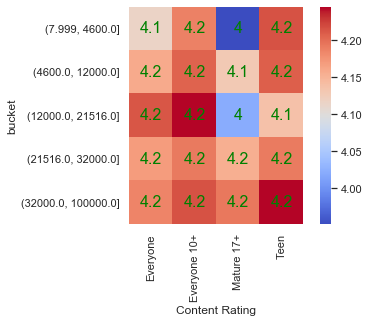

In [66]:
pivot=data.pivot_table(columns="Content Rating",index="bucket",values="Rating")
i= sns.heatmap(pivot,annot=True,cmap="coolwarm",annot_kws={"color":"green","size":16},square=True)

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

#### All the apps can be preferred for all the categories. Irrespective of size of the apps they can be used preferrably.
#### Heavier apps are also rated good irrespective of there cost and size even though there are less users.
#### Small apps are also preferred irrespective of they are paid or organic.
